In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')


In [2]:
from psikit import Psikit

In [3]:
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [5]:
#change smiles to smiles of caffeine
pk.read_from_smiles('Cn1cnc2n(C)c(=O)n(C)c(=O)c12')

In [6]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571176488529

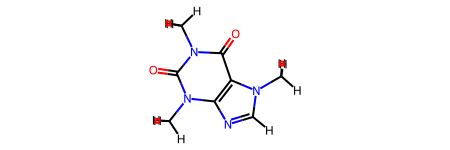

In [7]:
pk.mol

In [8]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20645937  0.07071061  0.08003699 -0.4679865   0.14093504  0.00257396
  0.01240581  0.38455734 -0.53318153 -0.05571521 -0.01917319  0.35795631
 -0.49223168 -0.10345785  0.111839    0.111839    0.111839    0.17443479
  0.04837467  0.04837467  0.04837467  0.05798449  0.05798449  0.05798449]
[-0.11403353 -0.69387388  0.38636848 -0.62281723  0.6349934  -0.87749773
 -0.12044046  1.09566798 -0.62720872 -0.87905279 -0.12348886  0.89978478
 -0.63013061  0.09327724  0.16723405  0.12973535  0.16731343  0.18240747
  0.16750801  0.14897052  0.14888149  0.1751872   0.145708    0.14550642]
[-0.13207508 -0.05284498  0.07895961 -0.2757626   0.14037235 -0.15247361
 -0.13223684  0.3474554  -0.39823144 -0.18709598 -0.13874662  0.29224527
 -0.39379567 -0.12517957  0.11713015  0.10370677  0.11724516  0.12057546
  0.12002268  0.10836907  0.10772356  0.12163472  0.10621199  0.10679023]


In [9]:
mol = pk.mol
atoms = mol.GetAtoms()


In [10]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [11]:
df = pd.DataFrame(data)

In [12]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.206,-0.114,-0.132
1,N,0.071,-0.694,-0.053
2,C,0.080,0.386,0.079
3,N,-0.468,-0.623,-0.276
4,C,0.141,0.635,0.140
5,N,0.003,-0.877,-0.152
6,C,0.012,-0.120,-0.132
7,C,0.385,1.096,0.347
8,O,-0.533,-0.627,-0.398
9,N,-0.056,-0.879,-0.187


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

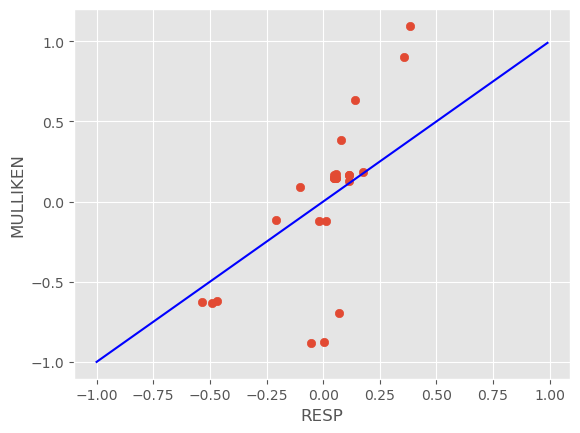

In [16]:
plt.style.use('ggplot')
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')


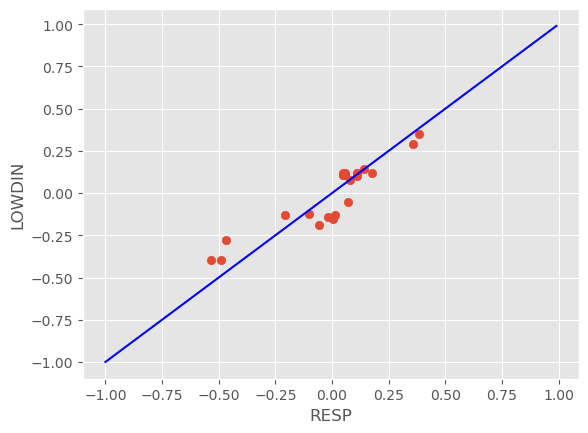

In [17]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

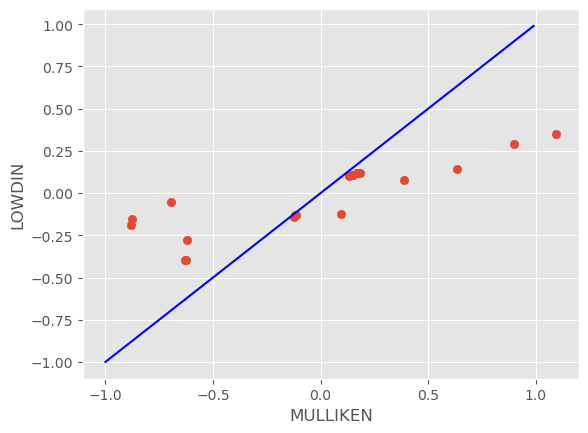

In [18]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')